## Observations and Insights 

In [226]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice.
merged["Mouse ID"].nunique()

249

In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = merged[merged.duplicated(subset=(["Mouse ID", "Timepoint"]), keep=False)]
dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [19]:
# Optional: Get all the data for the duplicate mouse ID. 



In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = merged.loc[merged["Mouse ID"] != "g989",:]
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice in the clean DataFrame.
clean["Mouse ID"].nunique()

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#I'm not doing this because why would I do it over a group by function
# This method is the most straighforward, creating multiple series and putting them all together at the end.


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
SEM = clean.iloc[:,6].groupby(clean.iloc[:,1]).sem()
# This method produces everything in a single groupby function
#It doesn't because you don't have a SEM in describe, but close
Summary = clean.iloc[:,6].groupby(clean.iloc[:,1]).describe().astype(int)
FinalDF = pd.concat([Summary, SEM], axis=1)
FinalDF.rename(columns={FinalDF.columns[8]: "SEM"}, inplace=True)
FinalDF

,count,mean,std,min,25%,50%,75%,max,SEM
Drug Regimen,,,,,,,,,
Capomulin,230,40,4,23,37,41,45,48,0.329346
Ceftamin,178,52,6,45,47,51,56,68,0.469821
Infubinol,178,52,6,36,47,51,57,72,0.492236
Ketapril,188,55,8,45,48,53,60,78,0.603860
Naftisol,186,54,8,45,47,52,59,76,0.596466
Placebo,181,54,7,45,47,52,59,73,0.581331
Propriva,148,52,6,45,46,50,56,72,0.544332
Ramicane,228,40,4,22,36,40,45,47,0.320955
Stelasyn,181,54,7,45,48,52,58,75,0.573111


## Bar and Pie Charts

In [24]:
MiceCount =  clean.iloc[:,0].groupby(clean.iloc[:,1]).nunique()
type(MiceCount)

pandas.core.series.Series

In [25]:
MiceCount2 = clean.groupby(["Drug Regimen"]).nunique()
MiceCount2.rename(columns={"Mouse ID": "Count"}, inplace=True)
MiceCount2

,Count,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,,
Capomulin,25,1,2,15,9,10,206,4
Ceftamin,25,1,2,15,6,10,154,5
Infubinol,25,1,2,15,7,10,154,5
Ketapril,25,1,2,15,6,10,164,5
Naftisol,25,1,2,14,6,10,162,5
Placebo,25,1,2,18,6,10,157,5
Propriva,24,1,2,14,6,10,125,5
Ramicane,25,1,2,15,9,10,204,4
Stelasyn,24,1,2,14,6,10,158,5


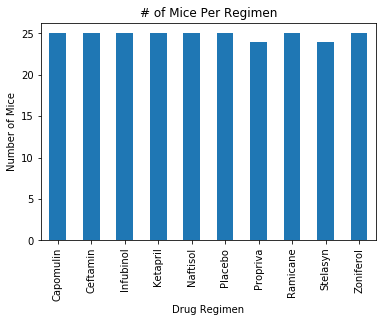

In [26]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

MiceCountPlot = MiceCount2.plot.bar(y="Count", width=0.5, legend=False, title="# of Mice Per Regimen")
MiceCountPlot.set_ylabel("Number of Mice")
MiceCountPlot

Text(0.5, 1.0, 'Number of Mice Per Drug')

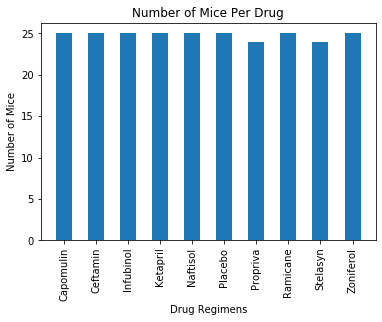

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(x=MiceCount2.index, height=MiceCount2["Count"], width = 0.5)
plt.xticks(rotation="vertical")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimens")
plt.title("Number of Mice Per Drug")

In [33]:
GenderMice = clean.groupby(["Sex"]).nunique()
GenderMice.rename(columns={"Mouse ID": "Amount"}, inplace=True)
GenderMice = GenderMice.iloc[:,0]
GenderMice

Sex
Female    123
Male      125
Name: Amount, dtype: int64

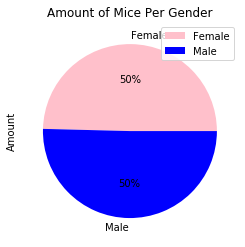

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

GenderPandaPlot = GenderMice.plot.pie(title="Amount of Mice Per Gender", colors=["Pink", "Blue"], autopct='%1.0f%%')
GenderPandaPlot.legend(loc="best")

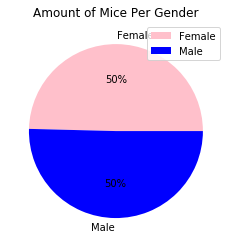

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(x=GenderMice, labels=GenderMice.index, colors=["Pink", "Blue"], autopct='%1.0f%%')
plt.title("Amount of Mice Per Gender")
plt.legend(loc="best")

## Quartiles, Outliers and Boxplots

In [67]:
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"] 
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [68]:
FinalTumorDF = clean[clean["Drug Regimen"].isin(treatments)]
FinalTumorDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
LastTimepoint = FinalTumorDF.groupby(["Mouse ID"])["Timepoint"].max()
LastTimepoint


Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [70]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged = FinalTumorDF.merge(LastTimepoint, on="Mouse ID")
merged = merged[merged["Timepoint_x"] == merged["Timepoint_y"]]
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
773,x822,Ceftamin,Male,3,29,45,61.386660,3,45
783,y163,Infubinol,Female,17,27,45,67.685569,3,45
793,y769,Ceftamin,Female,6,27,45,68.594745,4,45
803,y865,Ceftamin,Male,23,26,45,64.729837,3,45


In [160]:
#treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"] 
RamTV = merged[merged["Drug Regimen"] == "Ramicane"]
RamTV = RamTV.iloc[:,[1,6]]

CapTV = merged[merged["Drug Regimen"] == "Capomulin"]
CapTV = CapTV.iloc[:,[1,6]]

InfTV = merged[merged["Drug Regimen"] == "Infubinol"]
InfTV = InfTV.iloc[:,[1,6]]

CeftTV = merged[merged["Drug Regimen"] == "Ceftamin"]
CeftTV = CeftTV.iloc[:,[1,6]]
InfTV

,Drug Regimen,Tumor Volume (mm3)
463,Infubinol,67.973419
473,Infubinol,65.525743
490,Infubinol,57.031862
500,Infubinol,66.083066
524,Infubinol,72.226731
526,Infubinol,36.321346
533,Infubinol,60.969711
543,Infubinol,62.435404
553,Infubinol,60.918767
568,Infubinol,67.289621


In [154]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
#treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
RamTV.sort_values(by="Tumor Volume (mm3)", inplace=True)
RamQaurtiles = RamTV.iloc[:,1].quantile([.25,.5,.75])
RamLowerQ = RamQaurtiles[0.25]
RamUpperQ = RamQaurtiles[0.75]
RamIQR = RamUpperQ - RamLowerQ
RamOutliers = []
for row in RamTV["Tumor Volume (mm3)"]:
    if row  < RamLowerQ:
        RamOutliers.append(row)
    elif row > RamUpperQ:
        RamOutliers.append(row)

RamOutliers

[22.05012627,
 29.12847181,
 30.27623175,
 30.56462509,
 30.63869575,
 31.09533505,
 40.66771292,
 43.04754260000001,
 43.16637266,
 43.41938077,
 44.18345092,
 45.22086888]

In [153]:
CapTV.sort_values(by="Tumor Volume (mm3)", inplace=True)
CapQaurtiles = CapTV.iloc[:,1].quantile([.25,.5,.75])
CapLowerQ = CapQaurtiles[0.25]
CapUpperQ = CapQaurtiles[0.75]
CapIQR = CapUpperQ - CapLowerQ
CapOutliers = []
for row in CapTV["Tumor Volume (mm3)"]:
    if row < CapLowerQ:
        CapOutliers.append(row)
    elif row > CapUpperQ:
        CapOutliers.append(row)

CapOutliers

[23.34359787,
 28.43096411,
 28.48403281,
 30.48598484,
 31.02392294,
 31.896238399999998,
 40.65812366,
 40.72857787,
 41.48300765,
 41.58152074,
 46.53920617,
 47.68596303]

In [189]:
InfTV.sort_values(by="Tumor Volume (mm3)", inplace=True)
InfQaurtiles = InfTV.iloc[:,1].quantile([.25,.5,.75])
InfLowerQ = InfQaurtiles[0.25]
InfUpperQ = InfQaurtiles[0.75]
InfIQR = InfUpperQ - InfLowerQ
InfOutliers = []
for row in InfTV["Tumor Volume (mm3)"]:
    if row < InfLowerQ:
        InfOutliers.append(row)
    elif row > InfUpperQ:
        InfOutliers.append(row)

InfOutliers

[36.321345799999996,
 45.69933088,
 46.25011212,
 47.01036401,
 50.00513807,
 51.54243058,
 66.08306589,
 66.19691151,
 67.28962147,
 67.68556862,
 67.97341878,
 72.2267309]

In [188]:
CeftTV.sort_values(by="Tumor Volume (mm3)", inplace=True)
CeftQaurtiles = CeftTV.iloc[:,1].quantile([.25,.5,.75])
CeftLowerQ = CeftQaurtiles[0.25]
CeftUpperQ = CeftQaurtiles[0.75]
CeftIQR = CeftUpperQ - CeftLowerQ
CeftOutliers = []
for row in CeftTV["Tumor Volume (mm3)"]:
    if row < CeftLowerQ:
        CeftOutliers.append(row)
    elif row > CeftUpperQ:
        CeftOutliers.append(row)
CeftOutliers

[45.0,
 45.0,
 45.0,
 45.0,
 46.78453491,
 47.784681799999994,
 64.63494887,
 64.72983655,
 67.52748237,
 67.74866174,
 68.59474498,
 68.92318457]

In [158]:
CatDF = pd.concat([RamTV, CapTV, InfTV, CeftTV])

Text(0.5, 0.98, '')

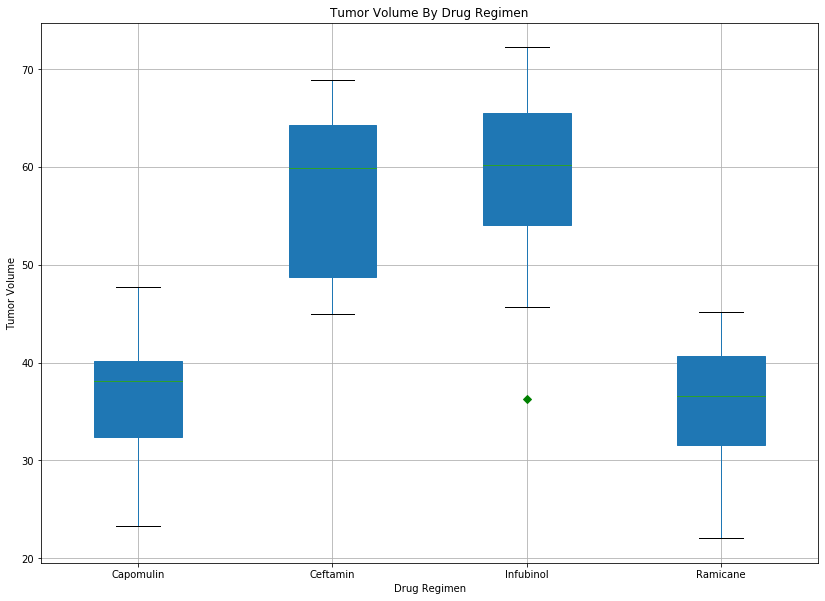

In [199]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
TVBox = CatDF.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen", figsize=(13.5,10), patch_artist=True, sym="gD")
TVBox.set_ylabel("Tumor Volume")
plt.title("Tumor Volume By Drug Regimen")
plt.suptitle("")


## Line and Scatter Plots

In [208]:
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [209]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
CapDF = clean[clean["Drug Regimen"] == "Capomulin"]
s185 = CapDF[CapDF["Mouse ID"] == "s185"]
s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0.5, 0, 'Time')

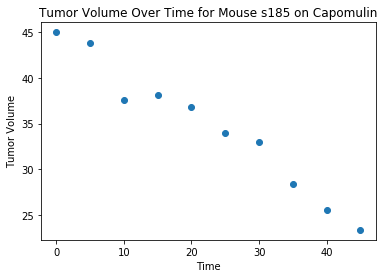

In [222]:
plt.scatter(s185.iloc[:,5],s185.iloc[:,6])
plt.title("Tumor Volume Over Time for Mouse s185 on Capomulin")
plt.ylabel("Tumor Volume")
plt.xlabel("Time")

In [218]:
WvsTV = CapDF.groupby(["Mouse ID"])["Weight (g)","Tumor Volume (mm3)"].mean()
WvsTV

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


Text(0.5, 0, 'Weight')

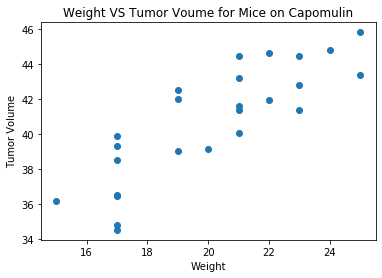

In [221]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(WvsTV.iloc[:,0],WvsTV.iloc[:,1])
plt.title("Weight VS Tumor Voume for Mice on Capomulin")
plt.ylabel("Tumor Volume")
plt.xlabel("Weight")

## Correlation and Regression

The correlation between both factors is 0.84


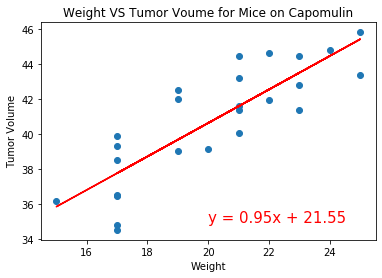

In [236]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = WvsTV.iloc[:,0]
tumorvolume = WvsTV.iloc[:,1]
correlation = st.pearsonr(weight,tumorvolume)

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumorvolume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(WvsTV.iloc[:,0],WvsTV.iloc[:,1])
plt.plot(weight,regress_values,"r-")
plt.title("Weight VS Tumor Voume for Mice on Capomulin")
plt.ylabel("Tumor Volume")
plt.xlabel("Weight")
plt.annotate(line_eq, xy=(20,35), fontsize=15,color="red")
print(f"The correlation between both factors is {round(correlation[0],2)}")